In [40]:
import chaosode
from scipy.interpolate import CubicSpline
from scipy import integrate
import numpy as np
from matplotlib import pyplot as plt
import utils
import importlib

[-6.15525068  5.83560541 15.99956653]
[-6.15510632  5.83550946 15.99947192]
[-6.15510632  5.83550946 15.99947192]
[-6.15496196  5.8354135  15.99937731]
[-6.15496197  5.83541351 15.99937732]
[-6.12521143  5.81562962 15.97988244]
[-6.12521132  5.81562962 15.97988228]
[-6.09558383  5.79590974 15.96047346]
[-6.0955836   5.79590976 15.96047315]
[-6.06607857  5.77625393 15.94114962]
[-6.06607834  5.77625394 15.94114931]
[-5.95679798  5.70330257 15.86961935]
[-5.95679665  5.70330257 15.86961765]
[-5.97994536  5.71877455 15.88476557]
[-5.97994453  5.71877457 15.8847645 ]
[-5.89485477  5.66185102 15.82909616]
[-5.89485564  5.66185087 15.82909741]
[-5.81080012  5.60548332 15.7741329 ]
[-5.81080015  5.60548323 15.77413303]
[-5.72776644  5.54967189 15.71985634]
[-5.72776647  5.5496718  15.71985647]
[-5.56471845  5.43971759 15.61330801]
[-5.56471862  5.43971719 15.6133086 ]
[-5.40562113  5.33198403 15.50934088]
[-5.40562106  5.33198435 15.50934053]
[-5.25038425  5.22646726 15.40784403]
[-5.25038417

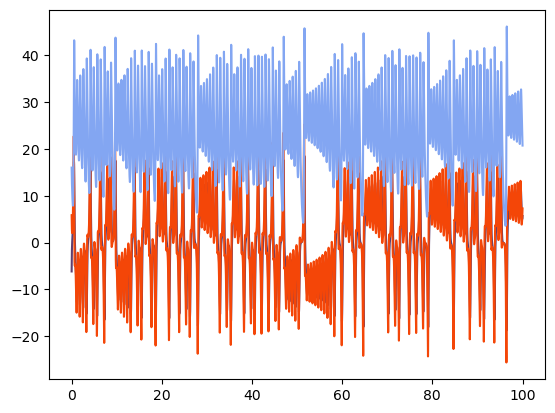

In [21]:
t, U = chaosode.orbit("lorenz", duration=100)
colors = chaosode.plot2d(t, U)

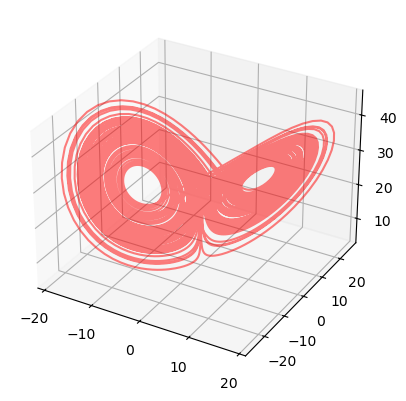

In [22]:
_ = chaosode.plot3d(U, color="red")

In [23]:
# Interpolate data
u = CubicSpline(t, U)

In [80]:
u(t)[:,0]

array([-6.15525068, -5.05103845, -4.11785393, ...,  5.39439196,
        5.52773639,  5.67936474])

In [72]:
#Nudging term definition
def lorenz_nudged(X, t, sigma=10., beta=8./3, rho=28.0, nudging_strength=0.1, u=None):
    """Compute the nudged Lorenz system."""
    x, y, z = X
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    
    # Apply nudging if reference data is provided
    if u is not None:
        dxdt += nudging_strength * (u(t)[0] - x)
        dydt += nudging_strength * (u(t)[1] - y)
        dzdt += nudging_strength * (u(t)[2] - z)
    
    return np.array([dxdt, dydt, dzdt])

In [32]:
# Generate reference trajectory (true data)
#def generate_reference(duration=10, dt=0.01):
 #   initial_conditions = [1.0, 1.0, 1.0]
  #  t = np.linspace(0, duration, int(duration / dt))
   # reference = integrate.odeint(chaosode.lorenz, initial_conditions, t)
    #return t, reference

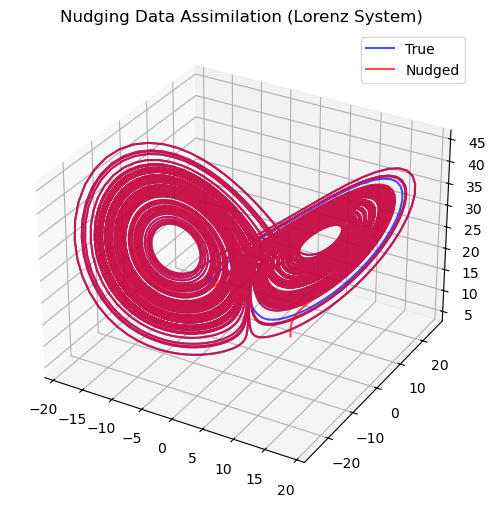

In [82]:
importlib.reload(chaosode)
# Run nudging data assimilation
def nudging_data_assimilation():
    # Generate reference trajectory (observations)
    #duration = 10
    #dt = 0.01
    #t_ref, reference = generate_reference(duration=duration, dt=dt)
    
    # Initial conditions for nudged system (different from reference)
    initial_conditions_nudged = [5.0, 5.0, 5.0]
    
    # Nudging parameters
    nudging_strength = 5.0
    
    # Integrate the nudged system
    nudged_trajectory = integrate.odeint(
        lorenz_nudged, initial_conditions_nudged, t, 
        args=(10.0, 8./3, 28.0, nudging_strength, u)
    )
     # Plot reference and nudged trajectories
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(projection='3d')
    ax.plot(u(t)[:,0], u(t)[:, 1], u(t)[:, 2], label="True", color="blue", alpha=0.7)
    ax.plot(nudged_trajectory[:, 0], nudged_trajectory[:, 1], nudged_trajectory[:, 2], label="Nudged", color="red", alpha=0.7)
    ax.set_title("Nudging Data Assimilation (Lorenz System)")
    ax.legend()
    plt.show()

# Run the nudging technique
nudging_data_assimilation()

In [ ]:

# Lorenz system definition
def lorenz(t, X, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of the Lorenz system."""
    x, y, z = X
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

# Nudging term definition
def lorenz_nudged(t, X, sigma=10., beta=8./3, rho=28.0, nudging_strength=0.1, reference=None):
    """Compute the nudged Lorenz system."""
    x, y, z = X
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    
    # Apply nudging if reference data is provided
    if reference is not None:
        dxdt += nudging_strength * (reference[0] - x)
        dydt += nudging_strength * (reference[1] - y)
        dzdt += nudging_strength * (reference[2] - z)
    
    return np.array([dxdt, dydt, dzdt])

# Generate reference trajectory (true data)
def generate_reference(duration=10, dt=0.01):
    initial_conditions = [1.0, 1.0, 1.0]
    t = np.linspace(0, duration, int(duration / dt))
    reference = integrate.odeint(lorenz, initial_conditions, t)
    return t, reference

# Run nudging data assimilation
def nudging_data_assimilation():
    # Generate reference trajectory (observations)
    duration = 10
    dt = 0.01
    t_ref, reference = generate_reference(duration=duration, dt=dt)
    
    # Initial conditions for nudged system (different from reference)
    initial_conditions_nudged = [5.0, 5.0, 5.0]
    
    # Nudging parameters
    nudging_strength = 5.0
    
    # Integrate the nudged system
    nudged_trajectory = integrate.odeint(
        lorenz_nudged, initial_conditions_nudged, t_ref, 
        args=(10., 8./3, 28.0, nudging_strength, reference)
    )
    
    # Plot reference and nudged trajectories
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(projection='3d')
    ax.plot(reference[:, 0], reference[:, 1], reference[:, 2], label="Reference", color="blue", alpha=0.7)
    ax.plot(nudged_trajectory[:, 0], nudged_trajectory[:, 1], nudged_trajectory[:, 2], label="Nudged", color="red", alpha=0.7)
    ax.set_title("Nudging Data Assimilation (Lorenz System)")
    ax.legend()
    plt.show()

# Run the nudging technique
nudging_data_assimilation()
